In [ ]:
import pandas as pd
import numpy as np

# read the data
data = pd.read_csv("data.csv")
data.head()

# Step 1 : EDA

In [3]:
data.shape

(50, 5)

In [4]:
# identify if there is any missing values
data.isnull().sum()

age          0
income       0
education    0
gender       0
salary       0
dtype: int64

In [5]:
data.dtypes

age           int64
income        int64
education    object
gender       object
salary        int64
dtype: object

# Step 2 : Feature Engineering (Preprocessing)

In [6]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
data['education'].unique()

array(['Bachelor', 'Master', 'High-School'], dtype=object)

In [8]:
# convert education to numerical values using one hot encoding
data['education'] = data['education'].map({'Bachelor' : 0, 'Master' : 1, 'High-School' : 2})

# convert gender to numerical values using one hot encoding
data['gender']=data['gender'].map({"Male":1, "Female":0})

data.head()

,age,income,education,gender,salary
0,45,126594,0,1,51604
1,40,53012,1,1,67827
2,54,72582,1,0,34289
3,34,115844,2,1,68001
4,21,103937,2,0,69637


## Method 2 
Lets perform one hot encoding to convert categorical columns to numerical columns

In [9]:
df = pd.read_csv("data.csv")
df.head()

,age,income,education,gender,salary
0,45,126594,Bachelor,Male,51604
1,40,53012,Master,Male,67827
2,54,72582,Master,Female,34289
3,34,115844,High-School,Male,68001
4,21,103937,High-School,Female,69637


In [10]:
df.shape

(50, 5)

In [11]:
df.dtypes

age           int64
income        int64
education    object
gender       object
salary        int64
dtype: object

In [12]:
# as eduction and gender is of object data type 
# lets convert them as string

df['education'] = df['education'].astype(str)
df['gender'] = df['gender'].astype(str)

In [13]:
df.dtypes

age           int64
income        int64
education    object
gender       object
salary        int64
dtype: object

In [14]:
# using one hot encoding, converting categorical columns to numerical columns

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
columns_to_encode = ['education', 'gender']
encoded_data = encoder.fit_transform(df[columns_to_encode])

# now create data frame with encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))
df = pd.concat([df, encoded_df], axis=1)

c:\0_Practice\accessment\env\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
df.head()

,age,income,education,gender,salary,education_High-School,education_Master,gender_Male
0,45,126594,Bachelor,Male,51604,0.0,0.0,1.0
1,40,53012,Master,Male,67827,0.0,1.0,1.0
2,54,72582,Master,Female,34289,0.0,1.0,0.0
3,34,115844,High-School,Male,68001,1.0,0.0,1.0
4,21,103937,High-School,Female,69637,1.0,0.0,0.0


In [20]:
df.to_csv('onehot_encoded_data.csv',index=False)

In [21]:
df2 = pd.read_csv("onehot_encoded_data.csv")
df2.head()

,age,income,education,gender,salary,education_High-School,education_Master,gender_Male
0,45,126594,Bachelor,Male,51604,0.0,0.0,1.0
1,40,53012,Master,Male,67827,0.0,1.0,1.0
2,54,72582,Master,Female,34289,0.0,1.0,0.0
3,34,115844,High-School,Male,68001,1.0,0.0,1.0
4,21,103937,High-School,Female,69637,1.0,0.0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

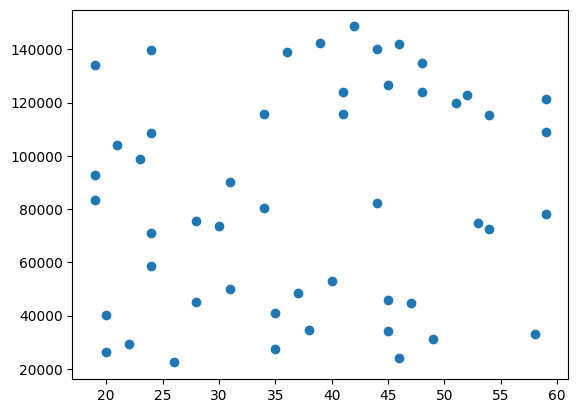

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(df['age'],df['income'])
plt.show



ValueError: `bins` must increase monotonically, when an array

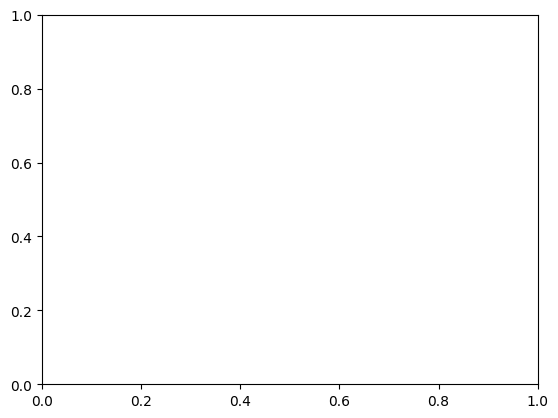

In [24]:
plt.hist(df['age'],df['income'],kde=True)